<a href="https://colab.research.google.com/github/bognix/Machine-Learning-Playground/blob/main/digits_recognition_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.9 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
#hide
from fastbook import *

In [ ]:
# this may not work in colab
from fastai.vision.widgets import *

In [ ]:
path = untar_data(URLs.MNIST)
fns = get_image_files(path)

In [ ]:
digits = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
  item_tfms=Resize(128))

dls = digits.dataloaders(path)

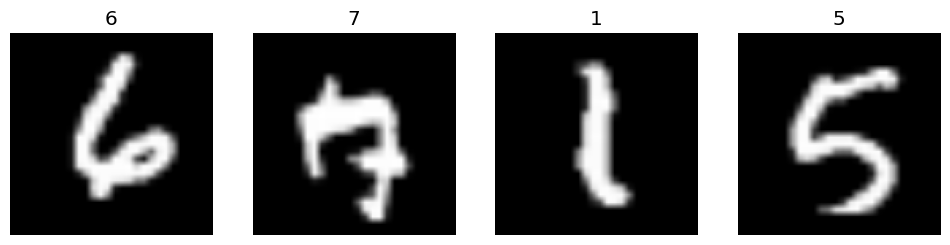

In [ ]:
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
digits = digits.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2, do_flip=False))
dls = digits.dataloaders(path)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 129MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.470359,0.144950,0.044786,02:25


epoch,train_loss,valid_loss,error_rate,time
0,0.106215,0.034752,0.010286,02:31
1,0.065280,0.020791,0.005929,02:29
2,0.040668,0.022248,0.005857,02:31
3,0.026754,0.017273,0.004429,02:29
4,0.023974,0.016928,0.004143,02:31


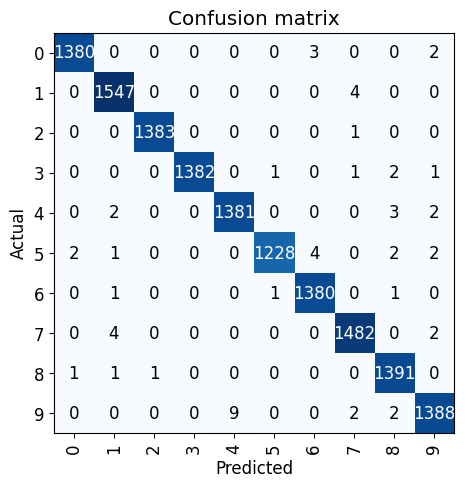

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

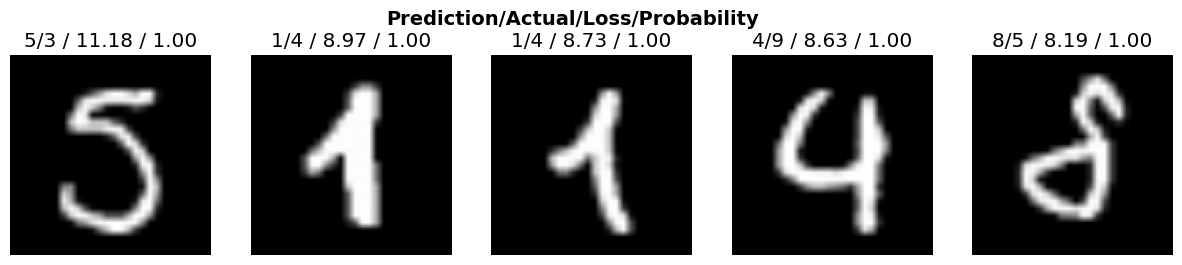

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [ ]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
# after cleaning the data we can train the model again

In [ ]:
learn.export()